In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
df_test = pd.read_pickle('./dataset/FIFAtest.pkl')
df_test

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,Joined,LoanedFrom,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,LogValue,Foot,PositionClass,LogWage
10,26650,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,10010000.0,2152,Right,4.0,4.0,4.0,2,Normal,1,ST,9.0,"Jul 1, 2014",0,2021,180.0,80,90,90,90,86,89,89,89,86,86,86,86,84,80,80,80,84,64,65,65,65,64,61,60,60,60,61,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,89.0,77.0,78.0,78.0,90.0,78.0,88.0,84.0,78.0,84.0,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,16523000.0,16.119095,4.0,Foward,101.905820
5718,1040,196885,C. Lampe,31,Bolivia,69,69,Boca Juniors,84500.0,1051,Right,1.0,3.0,1.0,6,Lean,0,GK,12.0,"Oct 9, 2018",0,2022,190.0,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0,17.0,12.0,23.0,12.0,13.0,13.0,18.0,19.0,21.0,28.0,35.0,39.0,65.0,34.0,13.0,36.0,18.0,70.0,17.0,35.0,27.0,17.0,55.0,14.0,45.0,19.0,17.0,13.0,66.0,71.0,62.0,68.0,70.0,118300.0,11.344519,3.0,GoalKeeper,69.479371
11780,390,210368,J. Duncan,25,Australia,64,67,Al Qadisiyah,52000.0,1102,Right,1.0,3.0,1.0,6,Normal,0,GK,1.0,"Jul 31, 2018",0,2019,185.0,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0,12.0,13.0,33.0,20.0,16.0,13.0,10.0,32.0,14.0,52.0,49.0,44.0,57.0,39.0,19.0,62.0,37.0,72.0,15.0,33.0,16.0,15.0,39.0,15.0,56.0,12.0,19.0,16.0,65.0,62.0,60.0,62.0,66.0,89700.0,10.859018,3.0,GoalKeeper,59.687076
8245,130,204424,P. Izzo,23,Australia,67,72,Adelaide United,94250.0,1148,Right,1.0,3.0,1.0,6,Normal,0,GK,20.0,"Jun 1, 2017",0,2020,180.0,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,14.0,15.0,34.0,10.0,22.0,14.0,15.0,32.0,23.0,46.0,47.0,48.0,60.0,59.0,15.0,63.0,33.0,63.0,16.0,28.0,24.0,14.0,47.0,12.0,58.0,15.0,19.0,20.0,68.0,63.0,63.0,66.0,69.0,124930.0,11.453717,3.0,GoalKeeper,48.751973
9673,260,237768,R. Shirasaki,25,Japan,66,68,Shimizu S-Pulse,100750.0,1770,Right,1.0,4.0,3.0,2,Lean,0,LCM,10.0,"Jan 1, 2012",0,2021,177.5,70,64,64,64,66,66,66,66,66,66,66,66,67,65,65,65,67,61,60,60,60,61,60,57,57,57,60,60.0,60.0,55.0,66.0,64.0,61.0,62.0,67.0,62.0,64.0,70.0,70.0,73.0,67.0,60.0,54.0,62.0,74.0,73.0,56.0,52.0,46.0,69.0,67.0,55.0,56.0,48.0,54.0,50.0,10.0,5.0,14.0,10.0,10.0,130000.0,11.520407,4.0,Medfielder,55.645204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,5330,210537,R. Steffen,26,Switzerland,75,75,VfL Wolfsburg,910000.0,1966,Left,1.0,3.0,3.0,2,Normal,0,RW,8.0,"Jan 10, 2018",0,2021,167.5,65,73,73,73,77,75,75,75,77,75,75,75,76,70,70,70,76,63,60,60,60,63,60,53,53,53,60,73.0,69.0,61.0,74.0,77.0,75.0,78.0,72.0,67.0,76.0,87.0,86.0,90.0,71.0,80.0,75.0,75.0,79.0,58.0,74.0,67.0,38.0,68.0,71.0,55.0,75.0,48.0,32.0,35.0,16.0,13.0,12.0,8.0,6.0,1547000.0,13.721201,4.5,Foward,85.812941
2982,1820,188058,A. Kravets,29,Ukraine,73,73,Kayserispor,520000.0,1711,Right,1.0,3.0,3.0,1,Normal,0,ST,11.0,"Jan 15, 2018",0,2021,185.0,79,73,73,73,67,70,70,70,67,67,67,67,66,64,64,64,66,56,56,56,56,56,55,54,54,54,55,46.0,73.0,75.0,67.0,69.0,64.0,53.0,47.0,49.0,66.0,62.0,65.0,47.0,76.0,45.0,72.0,61.0,75.0,79.0,65.0,59.0,54.0,78.0,59.0,59.0,71.0,28.0,32.0,34.0,10.0,15.0,8.0,13.0,6.0,1040000.0,13.161586,3.0,F

# 모든 계산은 훈련데이터에서 이뤄진 계산을 이용.

# 계산에 필요한 모든 수치(평균, 최대, 최소 등등)은

# 훈련데이터에서 이뤄진 수치들을 직접 대입해야한다.

# !! 절대 테스트 데이터의 수치를 가공한 값을 사용해선 안된다.

# 그것은 컨닝이다!!

# Age 가중치

In [3]:
# Age 변환

df_test['AgeWeight'] = df_test['Age']

def change_value_from(x):
    out = ''
    if x in [30,31]: out = 1.375
    elif x in [29,32]: out = 1.333
    elif x in [28,33]: out = 1.333
    elif x in [27,34]: out = 1.333
    elif x in [26,35]: out = 1.292
    elif x in [25,36]: out = 1.292
    elif x in [24,37]: out = 1.229
    elif x in [23,38]: out = 1.229
    elif x in [22,39]: out = 1.229
    elif x in [21,40]: out = 1.146
    elif x in [20,41]: out = 1.146
    elif x in [19,42]: out = 1
    elif x in [18,43,44,45]: out = 1
    elif x in [16,17,46,47]: out = 1
    return float(out)

df_test.AgeWeight = df_test.Age.apply(lambda x: change_value_from(x))
df_test.AgeWeight

10       1.333
5718     1.375
11780    1.229
8245     1.229
9673     1.229
         ...  
1794     1.229
2982     1.333
2190     1.375
6670     1.375
11536    1.333
Name: AgeWeight, Length: 3582, dtype: float64

# InternationalReputation 가중치

In [4]:
#InternationalReputation변환
def change(x):
    cat = ''
    if x == 1: cat = 1
    elif x == 2: cat = 1.36
    elif x == 3: cat = 1.54
    elif x == 4: cat = 1.68
    elif x == 5: cat = 1.78
    return float(cat)

df_test['InternationalReputationWeight'] = df_test.InternationalReputation. \
                                        apply(lambda x: change(x))
df_test.InternationalReputationWeight

10       1.68
5718     1.00
11780    1.00
8245     1.00
9673     1.00
         ... 
1794     1.00
2982     1.00
2190     1.00
6670     1.00
11536    1.00
Name: InternationalReputationWeight, Length: 3582, dtype: float64

# RealFace 가중치

In [5]:
def change(x):
    cat = ''
    if x == 0: cat = 1
    elif x ==1: cat = 1.38
    return cat

df_test['RealFaceWeight'] = df_test.RealFace.apply(lambda x: change(x))
df_test.RealFaceWeight

10       1.38
5718     1.00
11780    1.00
8245     1.00
9673     1.00
         ... 
1794     1.00
2982     1.00
2190     1.00
6670     1.00
11536    1.00
Name: RealFaceWeight, Length: 3582, dtype: float64

# PositionClass 가중치

In [6]:
def change(x):
    cat = ''
    if x == 'GoalKeeper': cat = 1
    elif x == 'Defender': cat = 1.07
    elif x == 'Medfielder': cat = 1.07
    elif x == 'Foward': cat = 1.13
    return cat

df_test['PositionClassWeight'] = df_test.PositionClass.apply(lambda x: change(x))
df_test.PositionClassWeight

10       1.13
5718     1.00
11780    1.00
8245     1.00
9673     1.07
         ... 
1794     1.13
2982     1.13
2190     1.07
6670     1.00
11536    1.07
Name: PositionClassWeight, Length: 3582, dtype: float64

In [7]:
# 포지션 클래스는 0,1,2,3 으로 원핫인코딩 하자.

def change(x):
    cat = ''
    if x == 'GoalKeeper': cat = 0
    elif x == 'Defender': cat = 1
    elif x == 'Medfielder': cat = 2
    elif x == 'Foward': cat = 3
    return cat

df_test['PositionClass1'] = df_test.PositionClass.apply(lambda x: change(x))
df_test['PositionClass1']

10       3
5718     0
11780    0
8245     0
9673     2
        ..
1794     3
2982     3
2190     2
6670     0
11536    1
Name: PositionClass1, Length: 3582, dtype: int64

# LoanedFrom 가중치

In [8]:
def change(x):
    cat = ''
    if x == 0: cat = 1
    elif x ==1: cat = 1.15
    return cat

df_test['LoanedFromWeight'] = df_test.LoanedFrom.apply(lambda x: change(x))
df_test.LoanedFromWeight

10       1.0
5718     1.0
11780    1.0
8245     1.0
9673     1.0
        ... 
1794     1.0
2982     1.0
2190     1.0
6670     1.0
11536    1.0
Name: LoanedFromWeight, Length: 3582, dtype: float64

# Total 컬럼 생성

In [9]:
df_test.Reactions = (df_test.Reactions-61.84375872661268)/ \
                8.99182501655843*10 +50
df_test.Composure = (df_test.Composure-58.66699246020664)/ \
                11.364099005853578*10 +50
df_test.Potential = (df_test.Potential-71.3573722423904)/ \
                6.127127303729245*10 +50

# 가중평균

df_test['Total'] = (df_test.Reactions*48 + df_test.Composure*38 + 
               df_test.Potential*35)/(48+38+35)

# 필요없는 컬럼 드랍

In [10]:
df_test.drop(['SkillMoves', 'WorkRate', 'BodyType', 'JerseyNumber','Height', 'Weight',
         'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
         'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB',
         'LB', 'LCB', 'CB', 'RCB', 'RB','Crossing', 'Finishing', 'HeadingAccuracy',
         'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 
         'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
         'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
         'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
         'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
         'GKHandling', 'GKKicking', 'GKPositioning',
         'GKReflexes'],axis=1,inplace=True)

# 훈련데이터의 클럽 관련 컬럼들을 테스트데이터에 삽입

In [11]:
df_train = pd.read_pickle('./dataset/나혼자FIFA_훈련데이터최종.pkl')
df_train

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,RealFace,Position,Joined,LoanedFrom,ContractValidUntil,Reactions,Composure,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,PositionClass1,LoanedFromWeight,Total,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25,PredictLogWage,PredictLogWage1,PredictTotal,PredictOverall,PredictClubLogWageMean,PredictLogValue
0,73450,158023,L. Messi,31,Argentina,94,86.954721,FC Barcelona,14365000.0,2202,Left,5.0,4.0,1,RF,"Jul 1, 2004",0,2021,86.873762,82.851709,29445000.0,16.480305,5.5,Foward,112.043738,17654.000000,97.787743,16250.0,96.959097,520.0,62.557500,1.375,1.78,1.38,1.13,3,1.0,85.634056,2.298240,2.090291,1.988824,1.622995,1344,1343,117.616683,152,159.229523,25.789825
1,54600,177003,L. Modrić,32,Croatia,91,82.058462,Real Madrid,8710000.0,2280,Right,4.0,4.0,1,RCM,"Aug 1, 2012",0,2020,81.313155,72.292139,17862000.0,15.979982,4.0,Medfielder,109.078075,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.695693,2.237408,2.122623,1.991895,1.654479,1276,1221,107.915979,146,158.479589,24.846485
2,49400,155862,Sergio Ramos,32,Spain,91,82.058462,Real Madrid,6630000.0,2201,Right,4.0,3.0,1,RCB,"Aug 1, 2005",0,2020,75.752549,70.532211,13598000.0,15.707116,3.0,Defender,108.077259,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,1,1.0,75.937128,2.237408,2.122623,1.991895,1.654479,1276,1199,104.864707,146,158.479589,24.544665
3,46150,173731,G. Bale,28,Wales,88,77.162203,Real Madrid,7800000.0,2279,Left,4.0,3.0,1,ST,"Sep 2, 2013",0,2022,75.752549,74.052067,15990000.0,15.869634,4.5,Foward,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.13,3,1.0,75.626265,2.237408,2.122623,1.991895,1.654479,1344,1267,104.520858,143,158.479589,24.724429
4,46150,182521,T. Kroos,28,Germany,90,80.426376,Real Madrid,9945000.0,2190,Right,4.0,5.0,1,LCM,"Jul 17, 2014",0,2022,80.201034,73.172103,20384000.0,16.112581,5.0,Medfielder,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.058783,2.237408,2.122623,1.991895,1.654479,1276,1218,107.211487,145,158.479589,24.993153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,130,221381,L. Tipton,25,Colombia,65,39.624220,Atlético Huila,61750.0,1759,Left,1.0,3.0,0,LB,"Aug 7, 2018",0,2023,51.285881,44.133285,83330.0,11.030865,4.5,Defender,48.751973,146.250000,49.921318,130.0,48.751973,130.0,48.751973,1.292,1.00,1.00,1.07,1,1.0,45.666404,1.141394,1.000000,1.000000,1.000000,67,-354,32.184140,62,61.120305,9.903857
14320,130,228457,A. Dabasse,24,France,61,36.360048,Chamois Niortais Football Club,42250.0,1463,Left,1.0,3.0,0,ST,"Jul 1, 2015",0,2019,35.716183,49.413071,77090.0,10.651383,4.5,Foward,48.751973,198.421053,52.954184,130.0,48.751973,130.0,48.751973,1.229,1.00,1.00,1.13,3,1.0,40.203927,1.224301,1.141394,1.000000,1.000000,83,-293,35.601290,68,68.155150,11.073709
14321,130,242534,C. Cásseres Jr,18,Venezuela,61,60.841341,New York Red Bulls,68250.0,1633,Right,1.0,3.0,0,CM,"Feb 2, 2018",0,2020,40.164668,53.812891,143000.0,11.130947,3.0,Medfielder,48.751973,429.000000,60.637852,260.0,55.645204,130.0,48.751973,1.000,1.00,1.00,1.07,2,1.0,50.431743,1.425160,1.366217,1.141394,1.000000,109,-320,50.960039,82,84.931485,13.812157
14322,130,236955,P. Tomczyk,20,Poland,58,37.992134,Lech Poznań,23400.0,1355,Right,1.0,2.0,0,ST,"Dec 17, 2016",0,2021,33.491940,35.333644,36270.0,10.060534,2.0,Foward,48.751973,448.500000,61.081359,390.0,59.687076,130.0,48.751973,1.146,1.00,1.00,1.13,3,1.0,35.372035,1.449298,1.283179,1.224301,1.000000,121,-436,42.801413,81,86.623728,13.408636


In [12]:
df_train1 = df_train[['Club','ClubWeight100','ClubWeight75','ClubWeight50',
                      'ClubWeight25','ClubLogWageMean', 'ClubLogWageMedian',
                      'ClubLogWageMin']]
df_train1

,Club,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25,ClubLogWageMean,ClubLogWageMedian,ClubLogWageMin
0,FC Barcelona,2.298240,2.090291,1.988824,1.622995,97.787743,96.959097,62.557500
1,Real Madrid,2.237408,2.122623,1.991895,1.654479,99.201480,97.157111,70.656134
2,Real Madrid,2.237408,2.122623,1.991895,1.654479,99.201480,97.157111,70.656134
3,Real Madrid,2.237408,2.122623,1.991895,1.654479,99.201480,97.157111,70.656134
4,Real Madrid,2.237408,2.122623,1.991895,1.654479,99.201480,97.157111,70.656134
...,...,...,...,...,...,...,...,...
14319,Atlético Huila,1.141394,1.000000,1.000000,1.000000,49.921318,48.751973,48.751973
14320,Chamois Niortais Football Club,1.224301,1.141394,1.000000,1.000000,52.954184,48.751973,48.751973
14321,New York Red Bulls,1.425160,1.366217,1.141394,1.000000,60.637852,55.645204,48.751973
14322,Lech Poznań,1.449298,1.283179,1.224301,1.000000,61.081359,59.687076,48.751973


In [13]:
df_join = pd.merge(df_test, df_train1,on='Club')
df_join

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,RealFace,Position,Joined,LoanedFrom,ContractValidUntil,Reactions,Composure,ReleaseClause,LogValue,Foot,PositionClass,LogWage,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,PositionClass1,LoanedFromWeight,Total,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25,ClubLogWageMean,ClubLogWageMedian,ClubLogWageMin
0,26650,188545,R. Lewandowski,29,Poland,90,80.426376,FC Bayern München,10010000.0,2152,Right,4.0,4.0,1,ST,"Jul 1, 2014",0,2021,81.313155,74.052067,16523000.0,16.119095,4.0,Foward,101.905820,1.333,1.68,1.38,1.13,3,1.0,78.776307,2.17840,1.964884,1.908509,1.652363,92.91275,93.04377,55.645204
1,26650,188545,R. Lewandowski,29,Poland,90,80.426376,FC Bayern München,10010000.0,2152,Right,4.0,4.0,1,ST,"Jul 1, 2014",0,2021,81.313155,74.052067,16523000.0,16.119095,4.0,Foward,101.905820,1.333,1.68,1.38,1.13,3,1.0,78.776307,2.17840,1.964884,1.908509,1.652363,92.91275,93.04377,55.645204
2,26650,188545,R. Lewandowski,29,Poland,90,80.426376,FC Bayern München,10010000.0,2152,Right,4.0,4.0,1,ST,"Jul 1, 2014",0,2021,81.313155,74.052067,16523000.0,16.119095,4.0,Foward,101.905820,1.333,1.68,1.38,1.13,3,1.0,78.776307,2.17840,1.964884,1.908509,1.652363,92.91275,93.04377,55.645204
3,26650,188545,R. Lewandowski,29,Poland,90,80.426376,FC Bayern München,10010000.0,2152,Right,4.0,4.0,1,ST,"Jul 1, 2014",0,2021,81.313155,74.052067,16523000.0,16.119095,4.0,Foward,101.905820,1.333,1.68,1.38,1.13,3,1.0,78.776307,2.17840,1.964884,1.908509,1.652363,92.91275,93.04377,55.645204
4,26650,188545,R. Lewandowski,29,Poland,90,80.426376,FC Bayern München,10010000.0,2152,Right,4.0,4.0,1,ST,"Jul 1, 2014",0,2021,81.313155,74.052067,16523000.0,16.119095,4.0,Foward,101.905820,1.333,1.68,1.38,1.13,3,1.0,78.776307,2.17840,1.964884,1.908509,1.652363,92.91275,93.04377,55.645204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76750,130,240529,Rayco,21,Spain,62,49.416738,CD Lugo,61750.0,1649,Right,1.0,3.0,0,CAM,"Jul 11, 2018",0,2020,41.276789,52.932927,111150.0,11.030865,3.0,Medfielder,48.751973,1.146,1.00,1.00,1.07,2,1.0,47.291925,1.42516,1.328871,1.283179,1.141394,62.55750,62.55750,48.751973
76751,130,240529,Rayco,21,Spain,62,49.416738,CD Lugo,61750.0,1649,Right,1.0,3.0,0,CAM,"Jul 11, 2018",0,2020,41.276789,52.932927,111150.0,11.030865,3.0,Medfielder,48.751973,1.146,1.00,1.00,1.07,2,1.0,47.291925,1.42516,1.328871,1.283179,1.141394,62.55750,62.55750,48.751973
76752,130,240529,Rayco,21,Spain,62,49.416738,CD Lugo,61750.0,1649,Right,1.0,3.0,0,CAM,"Jul 11, 2018",0,2020,41.276789,52.932927,111150.0,11.030865,3.0,Medfielder,48.751973,1.146,1.00,1.00,1.07,2,1.0,47.291925,1.42516,1.328871,1.283179,1.141394,62.55750,62.55750,48.751973
76753,130,240529,Rayco,21,Spain,62,49.416738,CD Lugo,61750.0,1649,Right,1.0,3.0,0,CAM,"Jul 11, 2018",0,2020,41.276789,52.932927,111150.0,11.030865,3.0,Medfielder,48.751973,1.146,1.00,1.00,1.07,2,1.0,47.291925,1.42516,1.328871,1.283179,1.141394,62.55750,62.55750,48.751973


In [14]:
df_join = df_join.drop_duplicates()
df_join

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,RealFace,Position,Joined,LoanedFrom,ContractValidUntil,Reactions,Composure,ReleaseClause,LogValue,Foot,PositionClass,LogWage,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,PositionClass1,LoanedFromWeight,Total,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25,ClubLogWageMean,ClubLogWageMedian,ClubLogWageMin
0,26650,188545,R. Lewandowski,29,Poland,90,80.426376,FC Bayern München,10010000.0,2152,Right,4.0,4.0,1,ST,"Jul 1, 2014",0,2021,81.313155,74.052067,16523000.0,16.119095,4.0,Foward,101.905820,1.333,1.68,1.38,1.13,3,1.0,78.776307,2.178400,1.964884,1.908509,1.652363,92.912750,93.04377,55.645204
20,650,246127,P. Will,19,Germany,61,59.209255,FC Bayern München,68250.0,1627,Left,1.0,3.0,0,CM,"Sep 4, 2018",0,2021,43.501032,44.133285,156000.0,11.130947,4.5,Medfielder,64.785096,1.000,1.00,1.00,1.07,2,1.0,48.243292,2.178400,1.964884,1.908509,1.652363,92.912750,93.04377,55.645204
40,650,243275,L. Mai,18,Germany,64,70.633858,FC Bayern München,110500.0,1402,Right,1.0,2.0,0,CB,"Apr 21, 2018",0,2021,51.285881,41.493393,299000.0,11.612780,2.0,Defender,64.785096,1.000,1.00,1.00,1.07,1,1.0,53.807076,2.178400,1.964884,1.908509,1.652363,92.912750,93.04377,55.645204
60,11050,213345,K. Coman,22,France,83,75.530117,FC Bayern München,4420000.0,1918,Right,2.0,3.0,1,LM,"Aug 30, 2015",0,2023,71.304064,64.372461,7631000.0,15.301650,3.0,Medfielder,93.102762,1.229,1.36,1.38,1.07,2,1.0,70.349609,2.178400,1.964884,1.908509,1.652363,92.912750,93.04377,55.645204
80,650,243357,F. Evina,17,Germany,63,65.737600,FC Bayern München,94250.0,1645,Right,1.0,3.0,0,LM,"Apr 28, 2018",0,2021,36.828304,40.613429,208000.0,11.453717,3.0,Medfielder,64.785096,1.000,1.00,1.00,1.07,2,1.0,46.379214,2.178400,1.964884,1.908509,1.652363,92.912750,93.04377,55.645204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76634,260,234553,Matheus Jesus,21,Brazil,65,57.577169,Portimonense SC,107250.0,1769,Left,1.0,3.0,0,CDM,"Jul 1, 2017",0,2021,46.837395,41.493393,247000.0,11.582927,4.5,Defender,55.645204,1.146,1.00,1.00,1.07,1,1.0,48.265660,1.632534,1.382007,1.283179,1.224301,65.617684,62.55750,55.645204
76657,130,245289,Pepê,20,Brazil,62,55.945083,Portimonense SC,74750.0,1604,Right,1.0,3.0,0,CAM,"Jan 1, 2018",0,2021,42.388910,48.533106,208000.0,11.221918,3.0,Medfielder,48.751973,1.146,1.00,1.00,1.07,2,1.0,48.239699,1.632534,1.382007,1.283179,1.224301,65.617684,62.55750,55.645204
76680,650,238857,Wilson Manafá,23,Portugal,70,55.945083,Portimonense SC,260000.0,1802,Right,1.0,4.0,0,LB,"Jul 1, 2016",0,2021,59.070730,49.413071,559000.0,12.468441,4.0,Defender,64.785096,1.229,1.00,1.00,1.07,1,1.0,55.133633,1.632534,1.382007,1.283179,1.224301,65.617684,62.55750,55.645204
76703,1560,232862,S. Nakajima,23,Japan,78,70.633858,Portimonense SC,1820000.0,1951,Right,1.0,4.0,1,LW,"Jan 6, 2018",0,2020,66.855579,69.652247,4186000.0,14.414348,4.0,Foward,73.530819,1.229,1.00,1.38,1.13,3,1.0,68.826762,1.632534,1.382007,1.283179,1.224301,65.617684,62.55750,55.645204


# 인덱스 정렬

In [15]:
df_test.columns

Index(['Wage', 'ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Special', 'PreferredFoot', 'InternationalReputation',
       'WeakFoot', 'RealFace', 'Position', 'Joined', 'LoanedFrom',
       'ContractValidUntil', 'Reactions', 'Composure', 'ReleaseClause',
       'LogValue', 'Foot', 'PositionClass', 'LogWage', 'AgeWeight',
       'InternationalReputationWeight', 'RealFaceWeight',
       'PositionClassWeight', 'PositionClass1', 'LoanedFromWeight', 'Total'],
      dtype='object')

In [16]:
df_test = df_join.sort_values(by='Wage', ascending=False)
df_test = df_test.reset_index()
df_test.drop('index',axis=1,inplace=True)
df_test[['Club', 'Name','ClubWeight100', 'ClubWeight75', 'ClubWeight50', 
    'ClubWeight25', 'ClubLogWageMean', 'ClubLogWageMin']]

,Club,Name,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25,ClubLogWageMean,ClubLogWageMin
0,FC Barcelona,L. Suárez,2.298240,2.090291,1.988824,1.622995,97.787743,62.557500
1,FC Barcelona,Coutinho,2.298240,2.090291,1.988824,1.622995,97.787743,62.557500
2,Real Madrid,Casemiro,2.237408,2.122623,1.991895,1.654479,99.201480,70.656134
3,FC Barcelona,Piqué,2.298240,2.090291,1.988824,1.622995,97.787743,62.557500
4,Manchester United,P. Pogba,2.139041,2.012069,1.962605,1.708364,94.987361,69.479371
...,...,...,...,...,...,...,...,...
3577,AS Béziers,J. Saki,1.283179,1.000000,1.000000,1.000000,51.478004,48.751973
3578,AS Béziers,S. Beusnard,1.283179,1.000000,1.000000,1.000000,51.478004,48.751973
3579,AS Béziers,Cidinho,1.283179,1.000000,1.000000,1.000000,51.478004,48.751973
3580,SKN St. Pölten,R. Ljubicic,1.366217,1.283179,1.224301,1.141394,60.485535,48.751973


# 테스트 데이터에서 PredictLogWage1컬럼 생성

In [17]:
df_test['PredictLogWage'] = 1

In [18]:
for i in range(df_test.shape[0]):
    df_test.PredictLogWage[i] = 2*(df_test.ClubWeight100[i]-1)* \
    (df_test.AgeWeight[i]*df_test.InternationalReputationWeight[i]* \
    df_test.RealFaceWeight[i]*df_test.PositionClassWeight[i]*df_test.LoanedFromWeight[i]* \
    df_test.ClubWeight75[i]*df_test.ClubLogWageMin[i])+48.75197323201151

In [19]:
df_test['PredictLogWage1'] = df_test.PredictLogWage

In [20]:
# 선수 한 명씩 추출
for i in range(df_test.shape[0]):
    
    
    # 클럽의 최소LogWage와 최대LogWage의 배수가 1이고
    if df_test.ClubWeight100[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 100%에 속하면 능력치를 0으로 만든다. 
        if df_test.PredictLogWage[i]<=df_test[df_test.Club==df_test.Club[i]].PredictLogWage.describe()[7]:
            df_test.PredictLogWage1[i] = -20
        
        
    # 클럽의 최소LogWage와 75% LogWage의 배수가 1이고       
    if df_test.ClubWeight75[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 75%에 속하면 능력치를 0으로 만든다. 
        if df_test.PredictLogWage[i]<=df_test[df_test.Club==df_test.Club[i]].PredictLogWage.describe()[6]:
            df_test.PredictLogWage1[i] = -20
       

    # 클럽의 최소LogWage와 50% LogWage의 배수가 1이고
    if df_test.ClubWeight50[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 50%에 속하면 능력치를 0으로 만든다. 
        if df_test.PredictLogWage[i]<=df_test[df_test.Club==df_test.Club[i]].PredictLogWage.describe()[5]:
            df_test.PredictLogWage1[i] = -20
       
        
    # 클럽의 최소LogWage와 25% LogWage의 배수가 1이고
    if df_test.ClubWeight25[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 25%에 속하면 능력치를 0으로 만든다.
        if df_test.PredictLogWage[i]<=df_test[df_test.Club==df_test.Club[i]].PredictLogWage.describe()[4]:
            df_test.PredictLogWage1[i] = -20
            
df_test

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,RealFace,Position,Joined,LoanedFrom,ContractValidUntil,Reactions,Composure,ReleaseClause,LogValue,Foot,PositionClass,LogWage,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,PositionClass1,LoanedFromWeight,Total,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25,ClubLogWageMean,ClubLogWageMedian,ClubLogWageMin,PredictLogWage,PredictLogWage1
0,59150,176580,L. Suárez,31,Uruguay,91,82.058462,FC Barcelona,10400000.0,2346,Right,5.0,4.0,1,RS,"Jul 11, 2014",0,2021,83.537398,73.172103,21320000.0,16.157316,4.0,Foward,109.878488,1.375,1.78,1.38,1.13,3,1.0,79.854390,2.298240,2.090291,1.988824,1.622995,97.787743,96.959097,62.557500,1344,1344
1,44200,189242,Coutinho,26,Brazil,88,78.794290,FC Barcelona,9035000.0,2175,Right,3.0,4.0,1,LW,"Jan 6, 2018",0,2023,73.528306,73.172103,19201000.0,16.016617,4.0,Foward,106.965027,1.229,1.54,1.38,1.13,3,1.0,74.939659,2.298240,2.090291,1.988824,1.622995,97.787743,96.959097,62.557500,1050,1050
2,37050,200145,Casemiro,26,Brazil,88,80.426376,Real Madrid,7735000.0,2170,Right,3.0,3.0,1,CDM,"Jul 11, 2013",0,2021,74.640428,72.292139,16432000.0,15.861266,3.0,Defender,105.200506,1.229,1.54,1.38,1.07,1,1.0,75.576570,2.237408,2.122623,1.991895,1.654479,99.201480,97.157111,70.656134,1086,1086
3,31200,152729,Piqué,31,Spain,87,75.530117,FC Barcelona,4420000.0,1950,Right,4.0,3.0,1,RCB,"Jul 1, 2008",0,2022,74.640428,74.052067,9061000.0,15.301650,3.0,Defender,103.482054,1.375,1.68,1.38,1.07,1,1.0,74.713002,2.298240,2.090291,1.988824,1.622995,97.787743,96.959097,62.557500,1206,1206
4,27300,195864,P. Pogba,25,France,87,82.058462,Manchester United,8320000.0,2247,Right,4.0,4.0,1,RDM,"Aug 9, 2016",0,2021,71.304064,74.932032,16016000.0,15.934173,4.0,Defender,102.146786,1.229,1.68,1.38,1.07,1,1.0,75.554202,2.139041,2.012069,1.962605,1.708364,94.987361,95.680847,69.479371,1019,1019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577,130,244689,J. Saki,27,France,55,23.303358,AS Béziers,11700.0,1584,Left,1.0,3.0,0,CM,"Jul 1, 2018",0,2021,33.491940,43.253321,20540.0,9.367430,4.5,Medfielder,48.751973,1.333,1.00,1.00,1.07,2,1.0,33.610387,1.283179,1.000000,1.000000,1.000000,51.478004,48.751973,48.751973,88,88
3578,130,244736,S. Beusnard,26,France,62,36.360048,AS Béziers,45500.0,1499,Right,1.0,4.0,0,CAM,"Jul 2, 2016",0,2021,42.388910,41.493393,83070.0,10.725490,4.0,Medfielder,48.751973,1.229,1.00,1.00,1.07,2,1.0,40.363788,1.283179,1.000000,1.000000,1.000000,51.478004,48.751973,48.751973,85,-20
3579,130,203297,Cidinho,25,Brazil,64,46.152565,AS Béziers,78000.0,1679,Right,1.0,3.0,0,CAM,"Jan 10, 2017",0,2022,40.164668,49.413071,143000.0,11.264477,3.0,Medfielder,48.751973,1.229,1.00,1.00,1.07,2,1.0,44.801161,1.283179,1.000000,1.000000,1.000000,51.478004,48.751973,48.751973,85,-20
3580,130,243525,R. Ljubicic,18,Austria,60,47.784651,SKN St. Pölten,39000.0,1566,Right,1.0,3.0,0,CM,"May 12, 2018",0,2021,49.061638,40.613429,64350.0,10.571343,3.0,Medfielder,48.751973,1.000,1.00,1.00,1.07,2,1.0,46.039105,1.366217,1.283179,1.224301,1.141394,60.485535,59.687076,48.751973,97,97


In [21]:
for i in range(df_test.shape[0]):
    df_test.PredictLogWage1[i]=df_test.PredictLogWage1[i]-(df_test.Total.max()-df_test.Total[i])*7 \
                            -(df_test.LogValue.max()-df_test.LogValue[i])*10

# 시각화

## PredictLogWage1

<Figure size 1440x360 with 0 Axes>

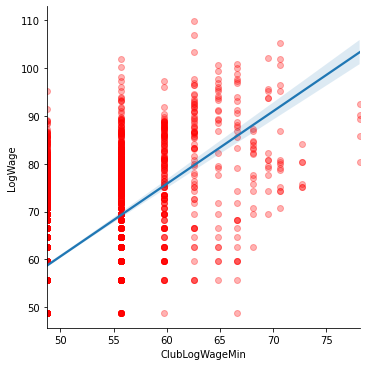

In [22]:
fig = plt.figure(figsize=(20,5))

sns.lmplot(data=df_test, x='ClubLogWageMin', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

<Figure size 1440x1440 with 0 Axes>

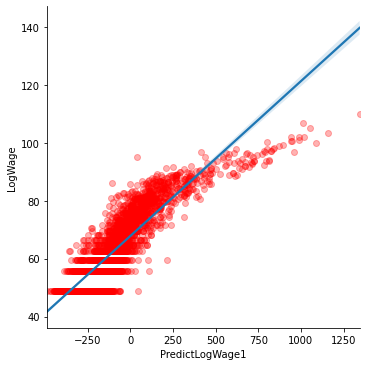

In [23]:
fig = plt.figure(figsize=(20,20))

sns.lmplot(data=df_test, x='PredictLogWage1', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

# 저장

In [24]:
df_test.to_pickle('./dataset/나혼자FIFA_테스트데이터최종.pkl')

# 테스트 데이터 예측

(14324, 13)
(14324, 2379)
Ridge train R2:  0.9520408705429362
Ridge test R2:   0.9318326650594374
Ridge GCV 최적 하이퍼 파라미터: {'alpha': 10}


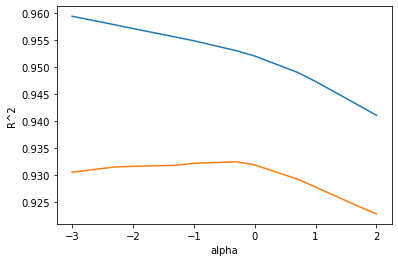

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


# 훈련용 데이터

Y_train = df_train['LogWage']

X_train = df_train[['AgeWeight', 'InternationalReputation', 'RealFace', 
             'LoanedFrom', 'PositionClassWeight',
             'Overall', 'LogValue', 'PredictLogWage1',
             'ClubLogWageMean',
             'ClubWeight100', 'ClubWeight75', 'ClubWeight50', 
             'ClubWeight25']]


# 테스트용 데이터

Y_test = df_test['LogWage']
X_test = df_test[['AgeWeight', 'InternationalReputation', 'RealFace', 
             'LoanedFrom', 'PositionClassWeight',
             'Overall', 'LogValue', 'PredictLogWage1',
             'ClubLogWageMean',
             'ClubWeight100', 'ClubWeight75', 'ClubWeight50', 
             'ClubWeight25']]


print(X_train.shape)
poly = PolynomialFeatures(degree=4, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
print(X_train_poly.shape)

X_test_poly = poly.transform(X_test)

ss = StandardScaler()
ss.fit(X_train_poly)
X_train_Scaled = ss.transform(X_train_poly)
X_test_Scaled = ss.transform(X_test_poly)

print('====================')

ridge = Ridge()
ridge.fit(X_train_Scaled, Y_train)
print('Ridge train R2: ', ridge.score(X_train_Scaled, Y_train))
print('Ridge test R2:  ', ridge.score(X_test_Scaled, Y_test))

print('====================')


# 하이퍼 파라미터 튜닝

parameters = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_dclf = GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
grid_dclf.fit(X_train, Y_train)
print('Ridge GCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)


print('====================')

train_score=[]
test_score=[]

alpha_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_Scaled, Y_train)
    train_score.append(ridge.score(X_train_Scaled, Y_train))
    test_score.append(ridge.score(X_test_Scaled, Y_test))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

XGBRegressor()
[12:45:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean cross-validation score: -12490657008130395350488842240.00
[12:45:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarede

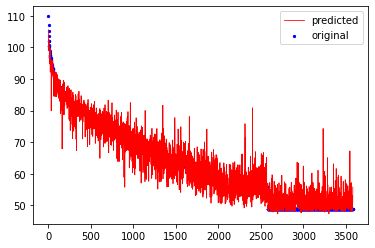

In [26]:
# K겹(5겹) 교차검증하고 Xgb를 이용

import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error



# 훈련용 데이터

Y_train = df_train['LogWage']

X_train = df_train[['AgeWeight', 'InternationalReputation', 'RealFace', 
             'LoanedFrom', 'PositionClassWeight',
             'Overall', 'LogValue', 'PredictLogWage1',
             'ClubLogWageMean',
             'ClubWeight100', 'ClubWeight75', 'ClubWeight50', 
             'ClubWeight25']]


# 테스트용 데이터

Y_test = df_test['LogWage']
X_test = df_test[['AgeWeight', 'InternationalReputation', 'RealFace', 
             'LoanedFrom', 'PositionClassWeight',
             'Overall', 'LogValue', 'PredictLogWage1',
             'ClubLogWageMean',
             'ClubWeight100', 'ClubWeight75', 'ClubWeight50', 
             'ClubWeight25']]



xgbr = xgb.XGBRegressor()
print(xgbr)
xgbr.fit(X_train, Y_train)
# - cross validataion
scores = cross_val_score(xgbr, X_train, Y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, Y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
ypred = xgbr.predict(X_test)

print('r2 : ',r2_score(Y_test,ypred))

mse = mean_squared_error(Y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))
x_ax = range(len(Y_test))
plt.scatter(x_ax, Y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [27]:
df_train.columns

Index(['Wage', 'ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Special', 'PreferredFoot', 'InternationalReputation',
       'WeakFoot', 'RealFace', 'Position', 'Joined', 'LoanedFrom',
       'ContractValidUntil', 'Reactions', 'Composure', 'ReleaseClause',
       'LogValue', 'Foot', 'PositionClass', 'LogWage', 'ClubWageMean',
       'ClubLogWageMean', 'ClubWageMedian', 'ClubLogWageMedian', 'ClubWageMin',
       'ClubLogWageMin', 'AgeWeight', 'InternationalReputationWeight',
       'RealFaceWeight', 'PositionClassWeight', 'PositionClass1',
       'LoanedFromWeight', 'Total', 'ClubWeight100', 'ClubWeight75',
       'ClubWeight50', 'ClubWeight25', 'PredictLogWage', 'PredictLogWage1',
       'PredictTotal', 'PredictOverall', 'PredictClubLogWageMean',
       'PredictLogValue'],
      dtype='object')

In [28]:
# ***Regressor 로 모델 비교. # 연속형데이터 예측할 수 있는 모델. 
# 예측모델임. 정량적 예측모델  비교임 (ex 국어점수로 수학점수 예측하고 막 그런거)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor


# 훈련용 데이터

Y_train = df_train['LogWage']

X_train = df_train[['AgeWeight', 'InternationalReputation', 'RealFace', 
             'LoanedFrom', 'PositionClassWeight',
             'Overall', 'LogValue', 'PredictLogWage1',
             'ClubLogWageMean',
             'ClubWeight100', 'ClubWeight75', 'ClubWeight50',
             'ClubWeight25']]


# 테스트용 데이터

Y_test = df_test['LogWage']
X_test = df_test[['AgeWeight', 'InternationalReputation', 'RealFace', 
             'LoanedFrom', 'PositionClassWeight',
             'Overall', 'LogValue', 'PredictLogWage1',
             'ClubLogWageMean',
             'ClubWeight100', 'ClubWeight75', 'ClubWeight50',
             'ClubWeight25']]



print('===============================')
KNeighbors = KNeighborsRegressor(n_neighbors=3).fit(X_train,Y_train)
print(KNeighbors)
kn_pred = KNeighbors.predict(X_test)
mse = mean_squared_error(Y_test, kn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, kn_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))


print('===============================')
Linear = LinearRegression().fit(X_train,Y_train)
print(Linear)
lr_pred = Linear.predict(X_test)
mse = mean_squared_error(Y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, lr_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))

print('===============================')
poly = PolynomialFeatures(degree=4, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

ss = StandardScaler()
ss.fit(X_train_poly)
X_train_Scaled = ss.transform(X_train_poly)
X_test_Scaled = ss.transform(X_test_poly)

Ridge = Ridge(alpha=10)
Ridge.fit(X_train_Scaled, Y_train)
print(Ridge)
rg_pred = Ridge.predict(X_test_Scaled)
mse = mean_squared_error(Y_test, rg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, rg_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))


print('===============================')
RandomForest = RandomForestRegressor(n_estimators=700,criterion='mse').fit(X_train,Y_train)
print(RandomForest)
rf_pred = RandomForest.predict(X_test)
mse = mean_squared_error(Y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, rf_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))


print('===============================')
LGBM = LGBMRegressor(n_estimators=1200).fit(X_train,Y_train)
print(LGBM)
lg_pred = LGBM.predict(X_test)
mse = mean_squared_error(Y_test, lg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, lg_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))


print('===============================')
XGB = XGBRegressor(n_estimators=2000).fit(X_train,Y_train)
print(XGB)
xg_pred = XGB.predict(X_test)
mse = mean_squared_error(Y_test, xg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, xg_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))

KNeighborsRegressor(n_neighbors=3)
로그 변환된 MSE:   23.979
로그 변환된 RMSE:  4.897
결정계수 R2:       0.842
LinearRegression()
로그 변환된 MSE:   18.826
로그 변환된 RMSE:  4.339
결정계수 R2:       0.876
Ridge(alpha=10)
로그 변환된 MSE:   10.997
로그 변환된 RMSE:  3.316
결정계수 R2:       0.928
RandomForestRegressor(n_estimators=700)
로그 변환된 MSE:   10.21
로그 변환된 RMSE:  3.195
결정계수 R2:       0.933
LGBMRegressor(n_estimators=1200)
로그 변환된 MSE:   7.101
로그 변환된 RMSE:  2.665
결정계수 R2:       0.953
[12:46:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(n_estimators=2000)
로그 변환된 MSE:   7.161
로그 변환된 RMSE:  2.676
결정계수 R2:       0.953


# 트레인 데이터로 훈련시킨 모델에서의 변수 중요도

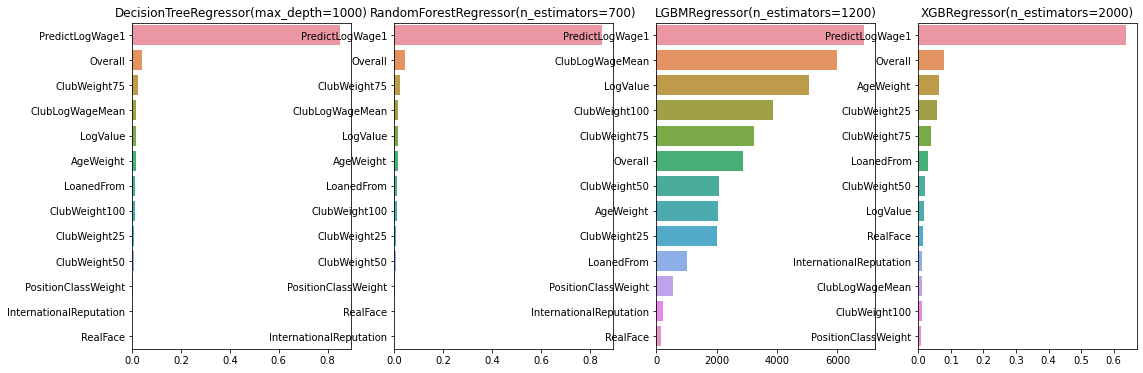

In [29]:
# 변수 중요도 시각화.
DecisionTree = DecisionTreeRegressor(max_depth=1000)
DecisionTree.fit(X_train, Y_train)

fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=4)
importance_df = pd.DataFrame()

models = [DecisionTree, RandomForest, LGBM, XGB]


for i_num, model in enumerate(models):
    feature_series = pd.Series(data=model.feature_importances_,index=X_train.columns)
    colname = str(model)
    importance_df[colname] = feature_series
    feature_series = feature_series.sort_values(ascending=False)
    axs[i_num].set_title(colname)
    sns.barplot(x=feature_series.values, y=feature_series.index, ax=axs[i_num])

# 

# 결과 시각화

In [30]:
# 일대일 결과 확인

df_Y_test1 = pd.DataFrame(Y_test)
df_predictions1 = pd.DataFrame(lg_pred , columns=['Predictions'])
df_NationalityClubName = df_test[['Nationality','Club','Name']]

df_Y_test1.LogWage= np.expm1(df_Y_test1.LogWage/10)
df_predictions1.Predictions= np.expm1(df_predictions1.Predictions/10)

df_Y_test1 = df_Y_test1.astype(int)
df_predictions1 = df_predictions1.astype(int)


Y_test_predictions = pd.concat([df_NationalityClubName  ,df_Y_test1, df_predictions1],axis=1)
Y_test_predictions = Y_test_predictions.rename(columns={'LogWage':'Wage'})

# 모두 표시
Y_test_predictions.T

0             1            2             3     \
Nationality       Uruguay        Brazil       Brazil         Spain   
Club         FC Barcelona  FC Barcelona  Real Madrid  FC Barcelona   
Name            L. Suárez      Coutinho     Casemiro         Piqué   
Wage                59150         44200        37049         31199   
Predictions         59125         44693        33973         29166   

                          4                  5              6     \
Nationality             France             Poland          Spain   
Club         Manchester United  FC Bayern München    Real Madrid   
Name                  P. Pogba     R. Lewandowski  Lucas Vázquez   
Wage                     27299              26649          26649   
Predictions              27181              37208          26407   

                        7             8                9            10    \
Nationality           Brazil        France            Spain        Spain   
Club         Manchester City       Arsenal      Real Madrid      Chelsea   
Name             Fernandinho  A. Lacazette  Nacho Fernández  Azpilicueta   
Wage                   24050         23399            23399        22750   
Predictions            21530         27759            23691        21975   

                        11          12                 13         14    \
Nationality          Belgium     Morocco            Belgium     France   
Club         Manchester City    Juventus  Tottenham Hotspur    Chelsea   
Name              V. Kompany  M. Benatia    T. Alderweireld  O. Giroud   
Wage                   22099       20800              19500      18200   
Predictions            22603       22797              20080      17756   

                        15            16                   17            18    \
Nationality           France   Netherlands                Italy   Netherlands   
Club         Manchester City  FC Barcelona  Paris Saint-Germain     Liverpool   
Name              A. Laporte  J. Cillessen          M. Verratti  G. Wijnaldum   
Wage                   17549         17549                17549         16899   
Predictions            17623         18701                16914         19042   

                        19                 20                   21    \
Nationality           Brazil            Germany            Argentina   
Club         Manchester City  FC Bayern München  Paris Saint-Germain   
Name           Gabriel Jesus           M. Neuer          A. Di María   
Wage                   16899              16899                16250   
Predictions            17321              19882                15436   

                     22                 23               24            25    \
Nationality        Brazil     Korea Republic          Austria         Spain   
Club         FC Barcelona  Tottenham Hotspur  West Ham United  FC Barcelona   
Name               Arthur             H. Son    M. Arnautović  Denis Suárez   
Wage                16250              16250            15600         15600   
Predictions         15218              15692            16155         15686   

                      26         27         28          29               30    \
Nationality          Spain   Colombia     Brazil     Germany            Italy   
Club           Real Madrid  AS Monaco  Liverpool     Arsenal         Juventus   
Name         Dani Ceballos     Falcao    Alisson  S. Mustafi  F. Bernardeschi   
Wage                 15600      14949      14949       14949            14300   
Predictions          14904      13570      14468       14304            14268   

                          31        32              33            34    \
Nationality            England     Italy           Spain         Spain   
Club         Manchester United  Juventus  Rayo Vallecano   Real Madrid   
Name               M. Rashford  M. Perin        De Tomás  Kiko Casilla   
Wage                     14300     13649           13649         13649   
Predictions              14919     11

<Figure size 1440x360 with 0 Axes>

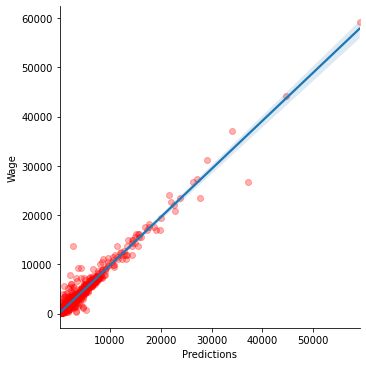

In [31]:
# 산점도로 결과 확인

fig = plt.figure(figsize=(20,5))

sns.lmplot(data=Y_test_predictions, x='Predictions', y='Wage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )